In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [2]:
musroom=pd.read_csv('musroom.csv')
musroom

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk.surface(blw.ring),stalk.col(abv.ring),stalk.col(blw.ring),veil.type,veil.color,ring.no,ring.type,spore.color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
#Data Exploration
musroom.head()

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk.surface(blw.ring),stalk.col(abv.ring),stalk.col(blw.ring),veil.type,veil.color,ring.no,ring.type,spore.color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
musroom.shape

(8124, 23)

In [5]:
musroom.columns

Index(['class', 'cap.shape', 'cap.surface', 'cap.color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk.surface(abv.ring)',
       'stalk.surface(blw.ring)', 'stalk.col(abv.ring)', 'stalk.col(blw.ring)',
       'veil.type', 'veil.color', 'ring.no', 'ring.type', 'spore.color',
       'population', 'habitat'],
      dtype='object')

In [6]:
musroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                      8124 non-null object
cap.shape                  8124 non-null object
cap.surface                8124 non-null object
cap.color                  8124 non-null object
bruises                    8124 non-null object
odor                       8124 non-null object
gill-attachment            8124 non-null object
gill-spacing               8124 non-null object
gill-size                  8124 non-null object
gill-color                 8124 non-null object
stalk-shape                8124 non-null object
stalk-root                 8124 non-null object
stalk.surface(abv.ring)    8124 non-null object
stalk.surface(blw.ring)    8124 non-null object
stalk.col(abv.ring)        8124 non-null object
stalk.col(blw.ring)        8124 non-null object
veil.type                  8124 non-null object
veil.color                 8124 non-null object
ring.no                    81

In [7]:
musroom.isnull().sum()

class                      0
cap.shape                  0
cap.surface                0
cap.color                  0
bruises                    0
odor                       0
gill-attachment            0
gill-spacing               0
gill-size                  0
gill-color                 0
stalk-shape                0
stalk-root                 0
stalk.surface(abv.ring)    0
stalk.surface(blw.ring)    0
stalk.col(abv.ring)        0
stalk.col(blw.ring)        0
veil.type                  0
veil.color                 0
ring.no                    0
ring.type                  0
spore.color                0
population                 0
habitat                    0
dtype: int64

In [16]:
musroom['class'].unique()

array(['p', 'e'], dtype=object)

In [15]:
musroom.describe()

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk.surface(blw.ring),stalk.col(abv.ring),stalk.col(blw.ring),veil.type,veil.color,ring.no,ring.type,spore.color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
#changing categorical value to numerical value
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [4]:
for col in musroom.columns:
    musroom[col]=le.fit_transform(musroom[col])
musroom.head()

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk.surface(blw.ring),stalk.col(abv.ring),stalk.col(blw.ring),veil.type,veil.color,ring.no,ring.type,spore.color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [21]:
#checking encoded values
musroom['cap.color'].unique()

array([4, 9, 8, 3, 2, 5, 0, 7, 1, 6], dtype=int64)

In [22]:
musroom.corr()

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk.surface(blw.ring),stalk.col(abv.ring),stalk.col(blw.ring),veil.type,veil.color,ring.no,ring.type,spore.color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap.shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap.surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap.color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [23]:
musroom.describe()

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk.surface(blw.ring),stalk.col(abv.ring),stalk.col(blw.ring),veil.type,veil.color,ring.no,ring.type,spore.color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# Data Visualization

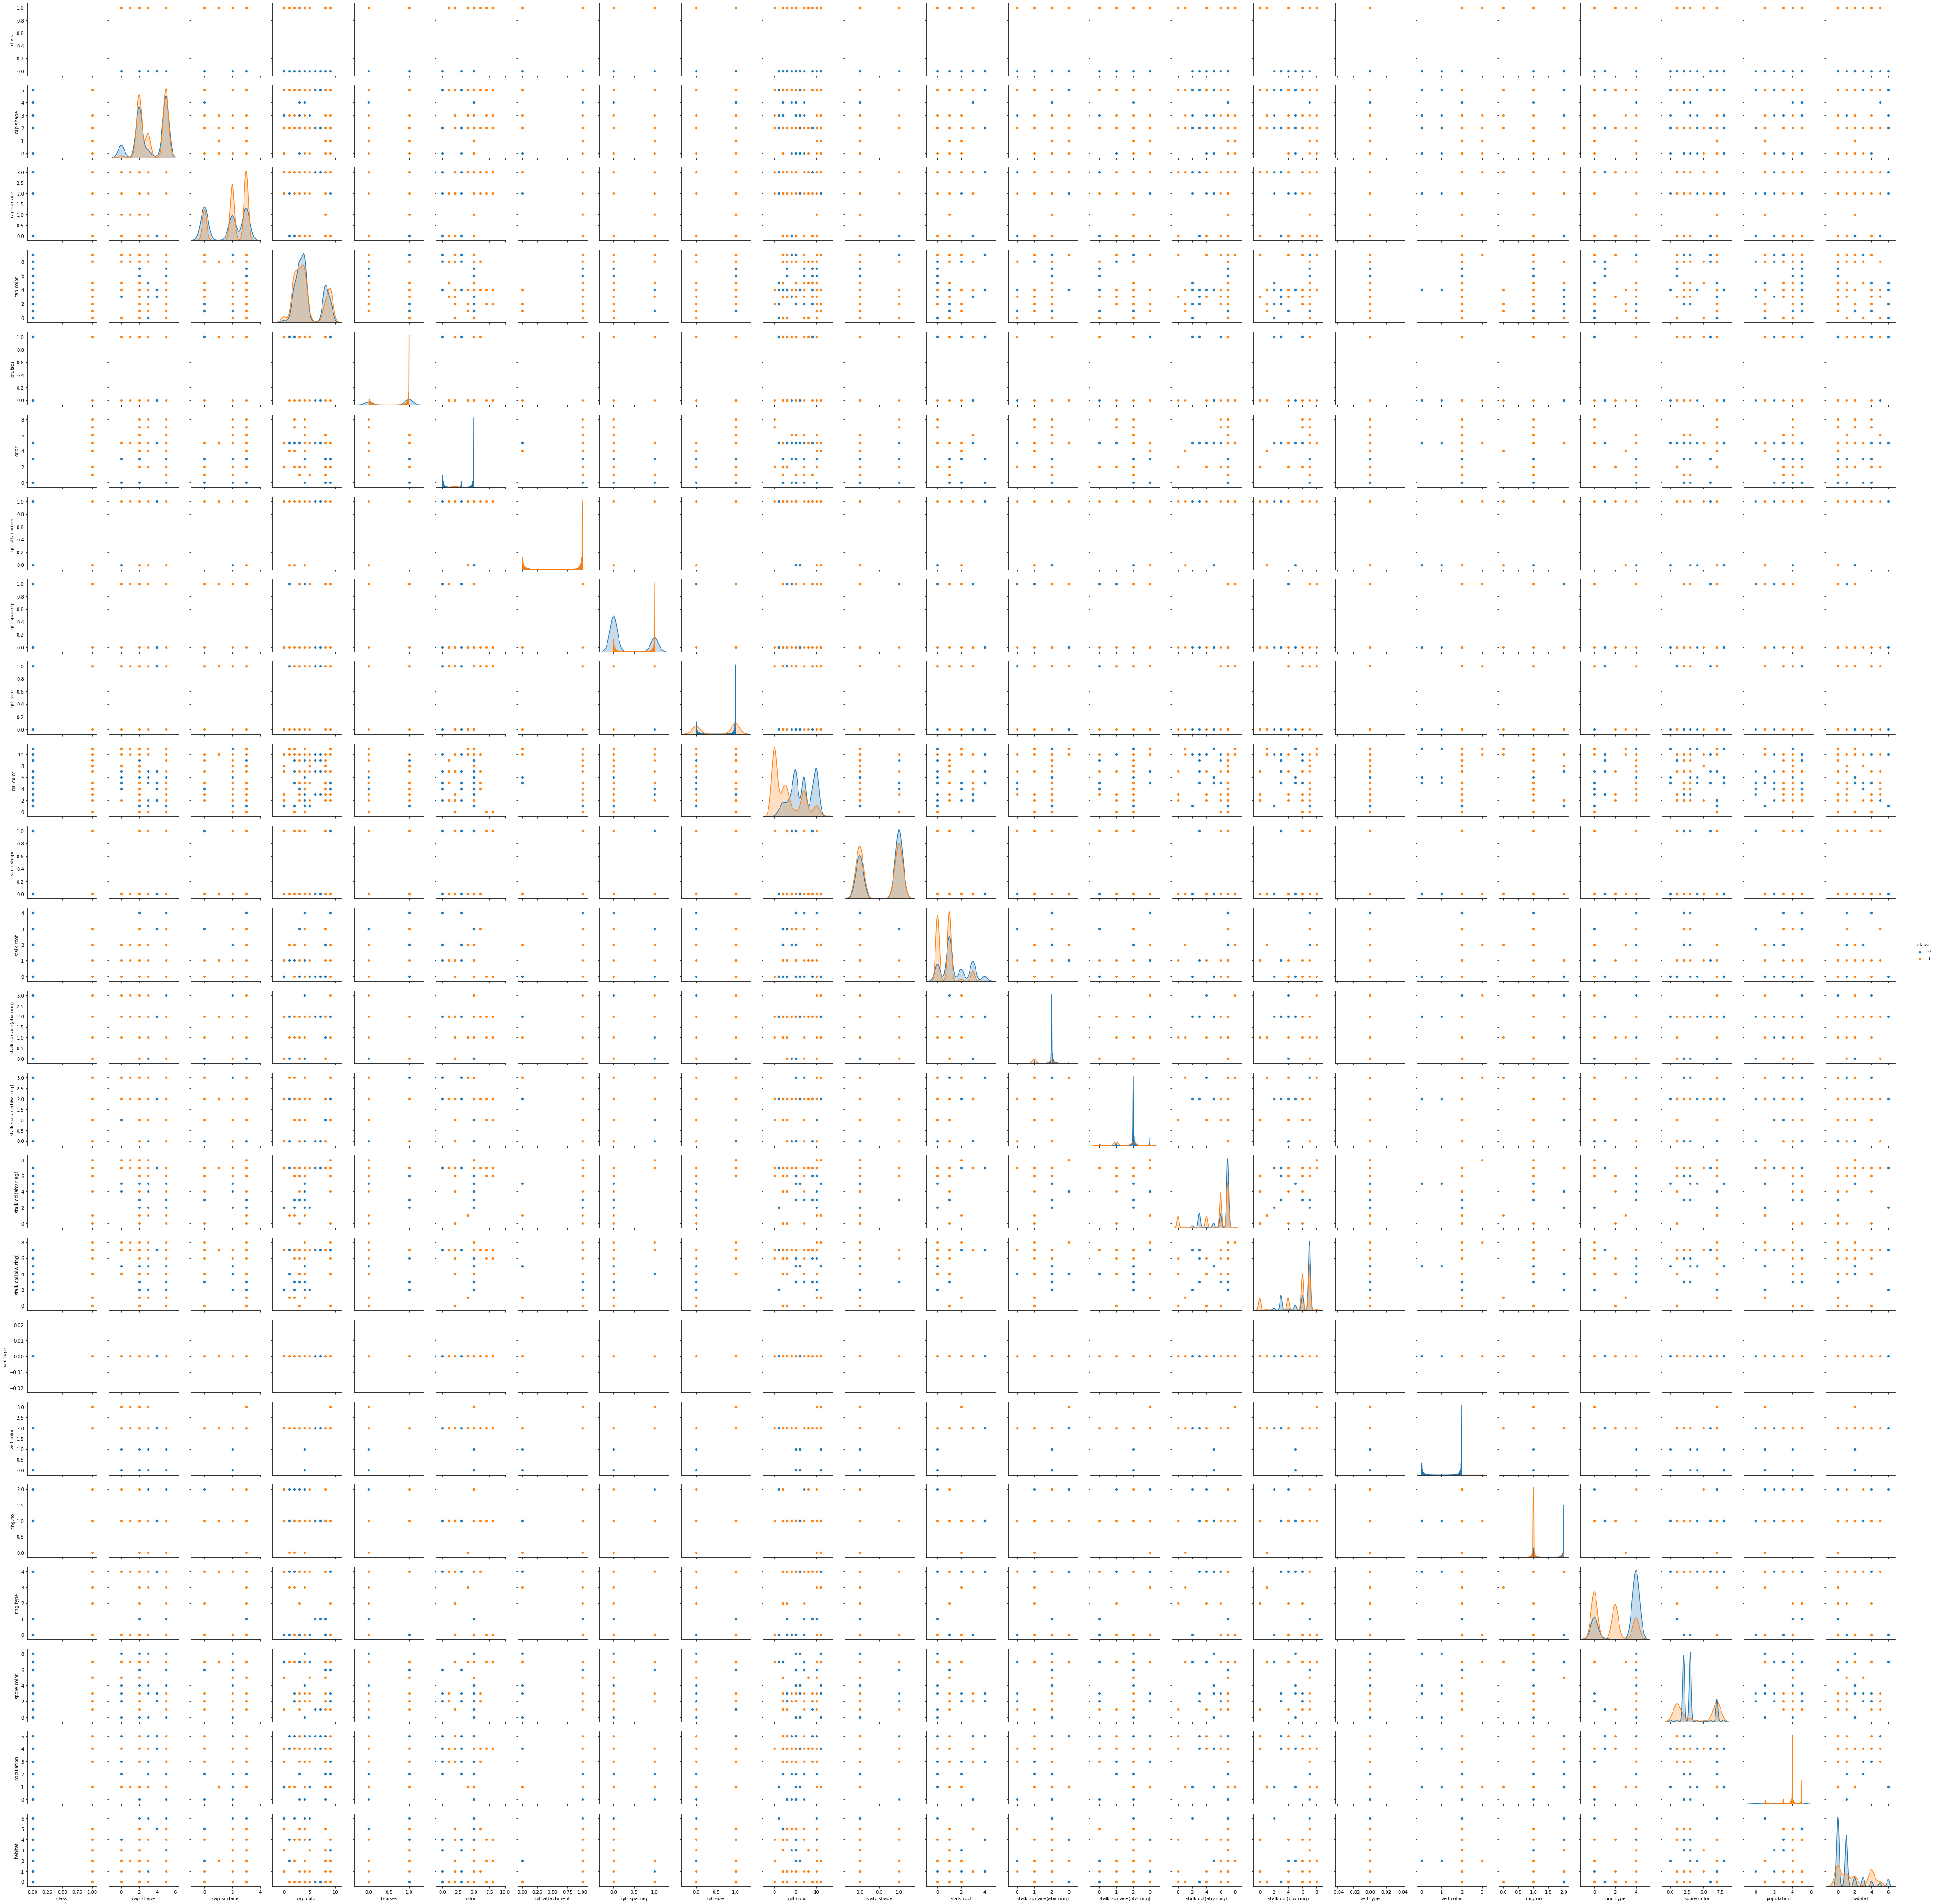

In [26]:
sns.pairplot(musroom,hue='class')

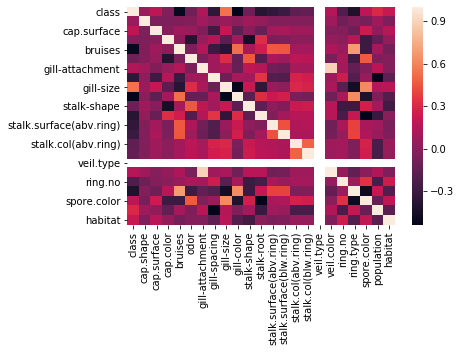

In [28]:
#correlation heatmap
sns.heatmap(musroom.corr())
plt.show()

In [5]:
#counting target variables
from collections import Counter
Counter(musroom['class'])

Counter({1: 3916, 0: 4208})

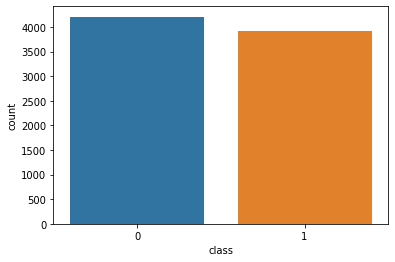

In [6]:
#plotting target variables
sns.countplot(x='class',data=musroom)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E5FEC10>,
      dtype=object)

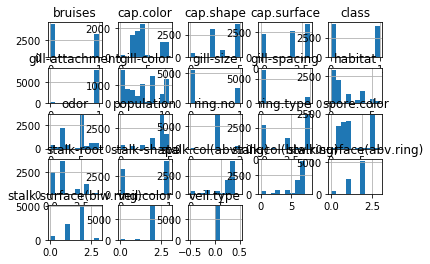

In [7]:
musroom.hist()

In [39]:
from scipy.stats import skew
skew(musroom)

array([ 0.07193225, -0.24700638, -0.59074975,  0.70683429,  0.34268693,
       -0.08077479, -5.97597269,  1.83974848,  0.82564441,  0.06139885,
       -0.27129511,  0.94767734, -1.09853651, -0.75756327, -1.83509546,
       -1.79126261,  0.        , -6.94566119,  2.7011584 , -0.28996465,
        0.54832458, -1.41283475,  0.98536569])

In [8]:
x=musroom.drop('class',axis=1)

In [9]:
y=musroom['class']

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [11]:
print(x.shape)
print(y.shape)

(8124, 22)
(8124,)


In [12]:
#splitting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.22,random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6336, 22)
(1788, 22)
(6336,)
(1788,)


In [14]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

95.24608501118567
[[879  50]
 [ 35 824]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       929
           1       0.94      0.96      0.95       859

    accuracy                           0.95      1788
   macro avg       0.95      0.95      0.95      1788
weighted avg       0.95      0.95      0.95      1788



In [15]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb)*100)
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

92.9530201342282
[[864  65]
 [ 61 798]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       929
           1       0.92      0.93      0.93       859

    accuracy                           0.93      1788
   macro avg       0.93      0.93      0.93      1788
weighted avg       0.93      0.93      0.93      1788



In [16]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

100.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [19]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

100.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [52]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[929   0]
 [  0 859]]
100.0


In [53]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [54]:
svmkernel('rbf')

1.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [56]:
svmkernel('poly')

1.0
[[929   0]
 [  0 859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1788
   macro avg       1.00      1.00      1.00      1788
weighted avg       1.00      1.00      1.00      1788



In [57]:
svmkernel('linear')


0.988255033557047
[[911  18]
 [  3 856]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       929
           1       0.98      1.00      0.99       859

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



In [140]:
#putting cross validation process
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [141]:
dtc=DecisionTreeClassifier()
score=cross_val_score(dtc,x,y,cv=18,scoring='accuracy')
print('score:',score)

score: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.98666667 1.         1.        ]


In [142]:
print('Accuracy score:',score)
print('Mean score:',score.mean()*100)
print('std deviation:',score.std())

Accuracy score: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.98666667 1.         1.        ]
Mean score: 99.92592592592592
std deviation: 0.0030541523152723352


In [143]:
y_pred=cross_val_predict(dtc,x,y,cv=12)

In [144]:
print('y pred value',y_pred)


y pred value [0 0 0 ... 0 1 0]


In [145]:
conf_mat=confusion_matrix(y,y_pred)
conf_mat

array([[4202,    6],
       [ 256, 3660]], dtype=int64)

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9677498769079271

In [159]:
#putting cv in 'knn ' model
knn=KNeighborsClassifier()

In [160]:
score=cross_val_score(knn,x,y,cv=18,scoring='accuracy')

In [161]:
print('Accuracy score:',score)
print('Mean score:',score.mean()*100)
print('std deviation:',score.std())

Accuracy score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 100.0
std deviation: 0.0


In [162]:
y_pred=cross_val_predict(dtc,x,y,cv=18)

In [163]:
print('y pred value',y_pred)

y pred value [1 0 0 ... 0 1 0]


In [164]:
conf_mat=confusion_matrix(y,y_pred)
conf_mat

array([[4202,    6],
       [   0, 3916]], dtype=int64)

In [165]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9992614475627769

##--here, i put all 'ML' algorithms and finally i  got 100% accuracy in knn,decision tree and random forest and again i put these model through cross validation process i go 99.96% accuracy in 'knn' and 96.77% accuracy in 'decision tree model'.

In [17]:
from sklearn.externals import joblib

In [20]:
#saving the model as pickl
joblib.dump(knn,"Project 18_musroom.pkl")

['Project 18_musroom.pkl']

In [21]:
#loading the model
knn_from_joblib=joblib.load('Project 18_musroom.pkl')

In [22]:
#using the model to make prediction
knn_from_joblib.predict(x_test)

array([0, 1, 1, ..., 1, 1, 0])